In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import silhouette_score, silhouette_samples
import warnings
from sklearn.exceptions import ConvergenceWarning
from datetime import datetime

In [3]:
types = pd.read_csv('asu.tsv', sep=';', comment='#',skip_blank_lines = False,header = 1)
types = types.drop([0,1])
types = types.reset_index()
types = types.drop('index',axis = 1)

l = []
for i in range(len(types['_1'])):
    if type(types['_1'][i]) != str:
        l.append(i)
        
types = types.drop(l)
types = types.reset_index()
cropped = types.drop('index',axis = 1)
cropped

/var/folders/q0/j2_r46dn4g923tw2ygktb44w0000gn/T/ipykernel_6706/1314442412.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  types = pd.read_csv('asu.tsv', sep=';', comment='#',skip_blank_lines = False,header = 1)


,_1,Type,RAJ2000,DEJ2000
0,312.908065 -41.341475,MISC,312.90804,-41.34142
1,311.509773 -38.03733,NaN,NaN,NaN
2,316.664941 -45.311435,NaN,NaN,NaN
3,321.557516 -43.650433,NaN,NaN,NaN
4,318.57321 -39.753376,NaN,NaN,NaN
...,...,...,...,...
857989,40.806788 -62.554542,NaN,NaN,NaN
857990,48.994722 -70.857645,NaN,NaN,NaN
857991,29.295227 -65.853188,NaN,NaN,NaN
857992,46.080168 -62.32618,NaN,NaN,NaN


In [4]:
cam1 = pd.read_csv('Sector 01 (1).csv', sep=',', comment='#', dtype = str)
cam2 = pd.read_csv('Sector 01 (2).csv', sep=',', comment='#', dtype = str)
cam3 = pd.read_csv('Sector 01 (3).csv', sep=',', comment='#', dtype = str)
cams = pd.concat([cam1,cam2,cam3])
cams = cams.reset_index()
alldata = cams.drop('index',axis = 1)
alldata

,ra,dec,Vmag,Kmag,w1mag,w4mag,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE,Unnamed: 13
0,312.908065,-41.341475,10.1590003967285,3.85199999809265,3.73200011253357,3.02600002288818,2932.0,43.97405,0.02801,13.916504,1257.72272,0.10409945,8.77144,NaN
1,311.509773,-38.03733,9.3120002746582,4.27500009536743,4.19899988174438,4.02699995040894,3343.0,8.72058,0.00757,18.55533867,6787.43283,0.10415349,8.16427,NaN
2,316.664941,-45.311435,7.92799997329712,5.51000022888184,5.4850001335144,5.38000011444092,4660.0,0.1555,0.00043,8.697815,56.49776,9.82695053,7.5447,NaN
3,321.557516,-43.650433,9.30099964141846,4.33199977874756,4.23799991607666,4.07600021362305,3180.0,16.56325,0.01331,12.65136727,59653.2397,0.10409945,8.02792,NaN
4,318.57321,-39.753376,8.51000022888184,4.88100004196167,4.83900022506714,4.71799993515015,3952.0,3.4978,0.00296,5.45745255,3953.34708,10.89407437,10.41665,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857989,40.806788,-62.554542,NaN,14.3319997787476,14.201000213623,9.37399959564209,3906.0,0.12196,0.01086,14.64927263,675.28947,13.916809,8.06362,NaN
857990,48.994722,-70.857645,17.3129997253418,15.8000001907349,15.6049995422363,9.47999954223633,NaN,-0.28832,0.00119,15.46312111,64.49011,13.916809,9.67914,NaN
857991,29.295227,-65.853188,17.4309997558594,15.0430002212524,15.4759998321533,9.25500011444092,4753.0,-0.24486,0.00222,7.32463632,30.26699,13.916809,11.62516,NaN
857992,46.080168,-62.32618,17.742000579834,14.8249998092651,14.5839996337891,9.42399978637695,4332.0,-0.20275,0.00649,14.64927263,128.57675,13.01413546,9.65545,NaN


In [5]:
stars = pd.concat([cropped, alldata], axis=1)

m = []
for i in range(len(stars['Type'])):
    if type(stars['Type'][i]) != str:
        m.append(i)
        
stars = stars.drop(m)
stars = stars.drop('Unnamed: 13', axis=1)
stars = stars.dropna(axis=0)
stars = stars.reset_index()
stars = stars.drop('index',axis = 1)
stars

,_1,Type,RAJ2000,DEJ2000,ra,dec,Vmag,Kmag,w1mag,w4mag,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE
0,312.908065 -41.341475,MISC,312.90804,-41.34142,312.908065,-41.341475,10.1590003967285,3.85199999809265,3.73200011253357,3.02600002288818,2932.0,43.97405,0.02801,13.916504,1257.72272,0.10409945,8.77144
1,325.888097 -43.14454,MISC,325.88804,-43.14456,325.888097,-43.14454,10.1979999542236,4.3270001411438,4.21199989318848,3.90599989891052,3070.0,30.66852,0.0231,11.59708667,2427.2134,0.10409945,7.5651
2,316.58919 -37.587605,DSCT,316.58900,-37.58761,316.58919,-37.587605,7.67000007629395,6.79899978637695,6.68900012969971,6.76300001144409,6955.0,5.44499,0.00342,0.19195178,1053.53284,0.19192628,7.78431
3,316.495762 -36.25944,EW,316.49575,-36.25944,316.495762,-36.25944,7.81099987030029,6.57299995422363,6.49300003051758,6.38700008392334,6229.0,159.30206,0.08317,0.20540965,13818.54387,0.2052788,9.75553
4,320.519456 -42.76817,SRB,320.51950,-42.76814,320.519456,-42.76817,10.4829998016357,4.31699991226196,4.28599977493286,3.56200003623962,2907.0,63.64927,0.04856,14.64895158,3442.16087,0.10420759,8.50958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20172,40.218723 -71.55455,VAR,40.17769,-71.55979,40.218723,-71.55455,17.0100002288818,15.2410001754761,15.1459999084473,9.42899990081787,5394.0,0.10081,0.00179,15.46312111,173.39735,0.1042076,8.773
20173,50.085421 -63.716766,EA,50.10655,-63.71658,50.085421,-63.716766,17.1189994812012,15.1639995574951,15.1899995803833,9.41699981689453,5181.0,2.77277,0.06068,0.20038602,2397.29459,0.20035915,11.69317
20174,38.415599 -70.746452,SRS,38.4805,-70.76797,38.415599,-70.746452,17.3059997558594,15.0249996185303,14.9259996414185,9.13399982452393,4851.0,7.01209,0.01693,7.13682513,686.66599,13.916809,10.53619
20175,47.326487 -64.232262,RRC,47.31803,-64.24475,47.326487,-64.232262,17.3169994354248,15.0790004730225,15.2650003433228,9.1540002822876,4891.0,0.34217,0.00719,0.3731048,2500.89979,0.37334696,9.18888


In [6]:
VmKmag = []
for i in range(len(stars['Kmag'])):
    VmKmag.append(float(stars['Vmag'][i]) - float(stars['Kmag'][i]))
    
w1mw4mag = []
for i in range(len(stars['w1mag'])):
    w1mw4mag.append(float(stars['w1mag'][i]) - float(stars['w4mag'][i]))

dict = {'VmKmag': VmKmag, 'w1mw4mag': w1mw4mag} 
   
calcs = pd.DataFrame(dict)
   
calcs 

,VmKmag,w1mw4mag
0,6.307000,0.706
1,5.871000,0.306
2,0.871000,-0.074
3,1.238000,0.106
4,6.166000,0.724
...,...,...
20172,1.769000,5.717
20173,1.955000,5.773
20174,2.281000,5.792
20175,2.237999,6.111


In [7]:
stars = pd.concat([stars, calcs], axis=1)
stars = stars.drop(['w1mag','w4mag','Vmag','Kmag','RAJ2000','DEJ2000','ra','dec'], axis=1)
stars

,_1,Type,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE,VmKmag,w1mw4mag
0,312.908065 -41.341475,MISC,2932.0,43.97405,0.02801,13.916504,1257.72272,0.10409945,8.77144,6.307000,0.706
1,325.888097 -43.14454,MISC,3070.0,30.66852,0.0231,11.59708667,2427.2134,0.10409945,7.5651,5.871000,0.306
2,316.58919 -37.587605,DSCT,6955.0,5.44499,0.00342,0.19195178,1053.53284,0.19192628,7.78431,0.871000,-0.074
3,316.495762 -36.25944,EW,6229.0,159.30206,0.08317,0.20540965,13818.54387,0.2052788,9.75553,1.238000,0.106
4,320.519456 -42.76817,SRB,2907.0,63.64927,0.04856,14.64895158,3442.16087,0.10420759,8.50958,6.166000,0.724
...,...,...,...,...,...,...,...,...,...,...,...
20172,40.218723 -71.55455,VAR,5394.0,0.10081,0.00179,15.46312111,173.39735,0.1042076,8.773,1.769000,5.717
20173,50.085421 -63.716766,EA,5181.0,2.77277,0.06068,0.20038602,2397.29459,0.20035915,11.69317,1.955000,5.773
20174,38.415599 -70.746452,SRS,4851.0,7.01209,0.01693,7.13682513,686.66599,13.916809,10.53619,2.281000,5.792
20175,47.326487 -64.232262,RRC,4891.0,0.34217,0.00719,0.3731048,2500.89979,0.37334696,9.18888,2.237999,6.111


RR = 0
EC = 1
ED = 2
DSCT = 3
GDOR = 4
DCEP = 6

In [8]:
h = []
for i in range(len(stars['Type'])):
    if 'RR' not in stars['Type'][i]:
        h.append(i)
RR = stars.drop(h)

for val in RR.Type.unique():
    RR.replace(to_replace=val, value=0, inplace=True)

RR

,_1,Type,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE,VmKmag,w1mw4mag
17,313.037168 -44.117469,0,6689.0,-0.24584,0.00017,2.35872949,97.95273,5.36226045,7.84118,1.030000,0.062000
32,316.707735 -39.548101,0,4995.5,-0.2949,0.00015,12.10130783,46.88342,13.01386874,10.6711,1.991000,0.015000
33,313.037233 -38.375238,0,5135.0,0.8386,0.00204,11.1332032,3955.68909,10.33303424,7.46914,2.121000,-0.028000
38,325.529948 -41.746186,0,4206.0,0.26542,0.0012,3.81274082,135.76632,7.31803081,9.67678,3.009000,0.117000
44,322.482535 -42.717335,0,4478.0,-0.14223,0.00044,1.04635368,16.44768,6.00410837,6.54329,2.210999,-0.065000
...,...,...,...,...,...,...,...,...,...,...,...
20130,26.936522 -69.44281,0,5080.0,-0.0848,0.00313,0.59857243,557.03453,0.59997826,7.35359,2.049000,5.389999
20138,56.378136 -71.963027,0,4701.0,-0.27963,0.01242,0.51448462,8.77079,11.51974555,4.95512,2.373000,4.598001
20151,41.106037 -66.037209,0,4864.0,-0.28189,0.01594,13.916809,48.65747,10.33320239,6.94738,2.267000,5.141000
20167,38.894043 -61.753326,0,4932.0,-0.29478,0.00395,14.64927263,61.11351,13.916809,9.24742,2.196000,6.193999


In [9]:
max(RR['BLS_Period'])

'9.82710286'

In [10]:
min(RR['BLS_Period'])

'0.10014936'

In [11]:
max(RR['LS_Period'])

'9.94057821'

In [12]:
min(RR['LS_Period'])

'0.10499106'

In [8]:
h = []
for i in range(len(stars['Type'])):
    if 'EC' not in stars['Type'][i]:
        if 'EW' not in stars['Type'][i]:
            h.append(i)
EC = stars.drop(h)

for val in EC.Type.unique():
    EC.replace(to_replace=val, value=1, inplace=True)

EC

,_1,Type,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE,VmKmag,w1mw4mag
3,316.495762 -36.25944,1,6229.0,159.30206,0.08317,0.20540965,13818.54387,0.2052788,9.75553,1.238000,0.106
29,315.98764 -42.852323,1,3660.0,8.4157,0.01285,9.27766933,1374.70683,0.10420759,8.23016,4.091000,0.244
34,322.869983 -38.556416,1,4538.0,3.18539,0.0043,11.1332032,7921.06287,10.89407437,11.78836,2.559000,-0.022
43,311.249716 -38.66717,1,4504.7998046875,-0.02237,0.00067,0.20227477,82.11215,0.4041821,7.36452,2.917000,0.106
54,318.491003 -35.553266,1,6883.0,51.74774,0.08502,0.47741009,8903.95492,0.95354707,9.88294,0.986000,0.296
...,...,...,...,...,...,...,...,...,...,...,...
20154,49.597271 -62.351631,1,4407.0,-0.18074,0.01121,8.4344297,53.40084,9.36826362,10.38692,2.814001,5.282
20158,29.296014 -69.417198,1,5030.0,2.8304,0.03175,0.17013214,7596.1992,0.34040927,10.32661,2.097000,5.680
20160,54.180419 -64.217087,1,4391.0,2.48343,0.00937,0.14633869,12091.30482,0.14630348,10.87976,2.745000,5.114
20170,34.078377 -65.507809,1,4141.0,-0.26812,0.00428,0.1354434,168.2384,0.27098653,10.25139,3.202999,4.971


In [9]:
h = []
for i in range(len(stars['Type'])):
    if 'ED' not in stars['Type'][i]:
        if 'EA' not in stars['Type'][i]:
            if 'ESD' not in stars['Type'][i]:
                if 'EB' not in stars['Type'][i]:
                    h.append(i)
ED = stars.drop(h)

for val in ED.Type.unique():
    ED.replace(to_replace=val, value=2, inplace=True)

ED

,_1,Type,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE,VmKmag,w1mw4mag
18,318.580514 -42.79865,2,7639.0,3.91685,0.01136,1.35111689,278.11897,2.69617697,12.17294,0.513000,-0.018
49,319.349907 -35.077507,2,3807.0,3.33931,0.0056,9.59758897,744.64868,0.10415349,8.52776,3.737999,-0.002
56,326.091341 -41.595419,2,2976.0,10.78949,0.02181,13.916504,2770.24812,0.10420759,8.60352,6.158999,0.492
60,313.671598 -45.730729,2,6590.0,21.95104,0.06351,0.49349305,1745.40927,0.9863605,11.40109,1.108000,-0.041
63,314.632219 -43.754751,2,6690.0,-0.1939,0.00041,16.37235765,442.88597,13.916504,12.53238,1.038000,-0.445
...,...,...,...,...,...,...,...,...,...,...,...
20147,29.786748 -63.337555,2,5905.0,0.82034,0.02943,0.1965651,1918.98424,0.39309623,12.56194,1.387000,5.944
20158,29.296014 -69.417198,2,5030.0,2.8304,0.03175,0.17013214,7596.1992,0.34040927,10.32661,2.097000,5.680
20159,41.907769 -67.080727,2,4985.0,-0.23305,0.01341,17.39601125,33.48176,13.916809,6.80815,2.142000,5.498
20166,49.084717 -61.694286,2,3471.0,2.06795,0.01557,0.27049191,6935.62772,0.54166776,9.52943,4.649000,4.533


In [10]:
h = []
for i in range(len(stars['Type'])):
    if 'DSCT' not in stars['Type'][i]:
        if 'HADS' not in stars['Type'][i]:
            h.append(i)
DSCT = stars.drop(h)

for val in DSCT.Type.unique():
    DSCT.replace(to_replace=val, value=3, inplace=True)

DSCT

,_1,Type,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE,VmKmag,w1mw4mag
2,316.58919 -37.587605,3,6955.0,5.44499,0.00342,0.19195178,1053.53284,0.19192628,7.78431,0.871000,-0.074000
8,316.602253 -37.595284,3,4171.0,5.12662,0.00343,0.19195178,1009.59981,0.19211005,7.20007,3.191000,0.098000
40,323.011194 -37.769822,3,7296.0,0.61889,0.00177,0.40163071,1604.05042,0.40095134,8.75011,0.763000,0.022000
65,322.711983 -38.513587,3,7085.0,0.18698,0.00106,0.11798647,1586.44772,0.10624934,7.12761,0.792001,0.337000
66,315.146654 -42.655623,3,7436.0,6.70882,0.01539,0.13916504,40.18014,0.13435165,9.17275,0.688000,0.415000
...,...,...,...,...,...,...,...,...,...,...,...
20050,46.831691 -65.05497,3,6500.0,-0.19645,0.01719,0.28518051,118.76635,0.16360102,9.66437,1.028000,5.643001
20060,28.803528 -62.22588,3,4196.0,-0.24816,0.00274,11.59734083,138.05916,0.17593833,9.41577,3.117999,4.573000
20082,52.856558 -66.155315,3,7256.0,-1.13834,0.01358,13.916809,13.86847,0.11855417,9.21225,0.665999,5.310000
20134,31.581516 -62.953217,3,4732.0,-0.16478,0.00226,14.64927263,208.02508,0.10409947,7.23428,2.411001,5.158000


In [11]:
h = []
for i in range(len(stars['Type'])):
    if 'GDOR' not in stars['Type'][i]:
        h.append(i)
GDOR = stars.drop(h)

for val in GDOR.Type.unique():
    GDOR.replace(to_replace=val, value=4, inplace=True)

GDOR

,_1,Type,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE,VmKmag,w1mw4mag
40,323.011194 -37.769822,4,7296.0,0.61889,0.00177,0.40163071,1604.05042,0.40095134,8.75011,0.763000,0.022
2058,335.695105 -33.93517,4,7340.0,0.77748,0.00261,0.40633019,1830.33524,0.42834266,6.45614,0.667001,0.269
3073,335.675906 -33.93381,4,5837.0,1.17814,0.00384,0.40573787,667.01167,0.42834266,5.26317,1.706000,4.945
3384,333.043439 -38.309795,4,5436.0,3.08979,0.00918,13.916809,102.30108,0.10409947,7.87854,1.735000,5.893
5166,319.68595 -23.807812,4,7359.0,6.0574,0.00837,0.61577449,1699.20403,0.61468223,6.23017,0.754000,0.092
5780,319.685285 -23.802168,4,5686.0,6.27668,0.00894,0.61577449,727.25843,0.61468223,6.11416,1.672000,3.026
7221,319.697468 -23.807835,4,4765.0,5.78344,0.00851,0.61577449,846.25653,1.723477,6.62088,2.374000,4.869
7794,331.160184 -64.7284,4,7447.0,43.87504,0.03108,0.8864015,2123.30339,0.88616383,7.56841,0.620000,-0.054
11352,317.252913 -58.332711,4,6983.0,3.1612,0.00535,1.06232855,978.00326,3.16383782,7.5368,1.470000,0.061
11810,317.269335 -58.326367,4,5582.0,3.2137,0.00554,1.06232855,870.32509,4.23140269,7.35875,1.611000,2.423


In [12]:
h = []
for i in range(len(stars['Type'])):
    if 'DCEP' not in stars['Type'][i]:
        h.append(i)
DCEP = stars.drop(h)

for val in DCEP.Type.unique():
    DCEP.replace(to_replace=val, value=5, inplace=True)

DCEP

,_1,Type,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE,VmKmag,w1mw4mag
89,324.115255 -35.221623,5,4317.0,7.86363,0.0166,6.78853854,15374.42689,13.916504,10.20809,2.847000,0.200000
423,324.094037 -35.228263,5,5167.0,5.86632,0.01716,6.958252,5608.23413,13.916504,10.22862,2.116000,2.013000
2147,330.914601 -35.362503,5,5417.7001953125,-0.00432,0.00205,1.97401546,1015.20504,1.95907409,9.09568,1.736000,1.276000
2569,330.891332 -35.380006,5,6536.0,7.91392,0.07276,1.97401546,10726.19463,1.95907409,9.7343,1.334001,3.804000
2785,336.8212 -37.852672,5,4453.0,2.33588,0.04251,2.7833618,4580.73696,2.77065094,9.12221,2.665000,3.782001
...,...,...,...,...,...,...,...,...,...,...,...
18914,51.809197 -80.846428,5,5134.0,6.10786,0.01324,23.194275,23364.73289,0.10426174,8.03453,1.998000,4.481000
19008,34.290767 -63.416164,5,3276.0,10.61066,0.01127,10.70523769,1840.62515,13.01413546,7.9497,5.073000,0.174000
19070,55.104204 -70.910229,5,4618.0,16.65455,0.04231,19.88115571,1732.96051,0.10404549,7.03786,2.465000,-0.022000
19653,24.457369 -70.632006,5,5427.0,-0.34161,0.00241,2.89933521,21.10145,3.02094567,5.23704,1.742000,3.632999


In [13]:
test = pd.concat([RR,EC,ED,DSCT,GDOR,DCEP])
test

,_1,Type,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE,VmKmag,w1mw4mag
17,313.037168 -44.117469,0,6689.0,-0.24584,0.00017,2.35872949,97.95273,5.36226045,7.84118,1.030000,0.062000
32,316.707735 -39.548101,0,4995.5,-0.2949,0.00015,12.10130783,46.88342,13.01386874,10.6711,1.991000,0.015000
33,313.037233 -38.375238,0,5135.0,0.8386,0.00204,11.1332032,3955.68909,10.33303424,7.46914,2.121000,-0.028000
38,325.529948 -41.746186,0,4206.0,0.26542,0.0012,3.81274082,135.76632,7.31803081,9.67678,3.009000,0.117000
44,322.482535 -42.717335,0,4478.0,-0.14223,0.00044,1.04635368,16.44768,6.00410837,6.54329,2.210999,-0.065000
...,...,...,...,...,...,...,...,...,...,...,...
18914,51.809197 -80.846428,5,5134.0,6.10786,0.01324,23.194275,23364.73289,0.10426174,8.03453,1.998000,4.481000
19008,34.290767 -63.416164,5,3276.0,10.61066,0.01127,10.70523769,1840.62515,13.01413546,7.9497,5.073000,0.174000
19070,55.104204 -70.910229,5,4618.0,16.65455,0.04231,19.88115571,1732.96051,0.10404549,7.03786,2.465000,-0.022000
19653,24.457369 -70.632006,5,5427.0,-0.34161,0.00241,2.89933521,21.10145,3.02094567,5.23704,1.742000,3.632999


In [14]:
X = test.drop(columns = ['_1', 'Type'])
Y = test['Type']
X_train, X_test, y_train, y_test = train_test_split(X.apply(pd.to_numeric),Y,test_size=0.25, train_size=0.75)
print(len(X_train), len(X_test), len(y_train), len(y_test))

9304 3102 9304 3102


In [15]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
ypred = knn.predict(X_test)

metrics.accuracy_score(y_test, ypred)

0.5054803352675693

In [16]:
metrics.confusion_matrix(y_test, ypred)

array([[1072,  239,   89,    2,    0,    1],
       [ 505,  426,   54,    0,    0,    1],
       [ 363,  131,   60,    5,    0,    0],
       [  56,   31,    7,    9,    0,    0],
       [   1,    1,    2,    0,    0,    0],
       [  19,   21,    5,    1,    0,    1]])

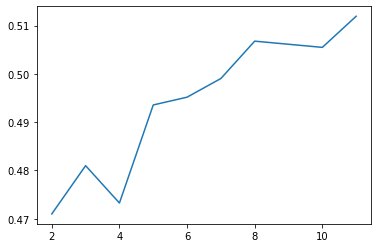

In [17]:
neighbors = [2,3,4,5,6,7,8,9,10,11]
accuracy = []
for val in neighbors:
    knn = KNeighborsClassifier(n_neighbors=val)
    knn.fit(X_train,y_train)
    ypred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, ypred))
    
plt.plot(neighbors,accuracy)

In [18]:
feature_names = [f"{val}" for val in list(X.columns.values)]
forest = RandomForestClassifier(random_state=50,n_estimators=100)
forest.fit(X_train, y_train)

ypredfor = forest.predict(X_test)

metrics.accuracy_score(y_test, ypredfor)

0.6985815602836879

In [19]:
metrics.confusion_matrix(y_test, ypredfor)

array([[1306,   61,   29,    2,    0,    5],
       [ 272,  565,  130,   17,    0,    2],
       [ 154,  151,  249,    2,    0,    3],
       [  29,   37,    5,   32,    0,    0],
       [   2,    0,    1,    1,    0,    0],
       [  12,    2,   17,    1,    0,   15]])

In [20]:
kmeans = KMeans(n_clusters = 6, random_state = 0, n_init=100)
kmeans.fit(X_train)

ypredkmeans = kmeans.predict(X_test)
metrics.accuracy_score(y_test, ypredkmeans)

0.2059961315280464

In [21]:
metrics.confusion_matrix(y_test, ypredkmeans)

array([[  14, 1165,  195,    0,   29,    0],
       [ 105,  552,  175,    1,  153,    0],
       [  16,  444,   73,    3,   23,    0],
       [  10,   80,    5,    0,    8,    0],
       [   0,    3,    1,    0,    0,    0],
       [  11,   22,    8,    3,    3,    0]])

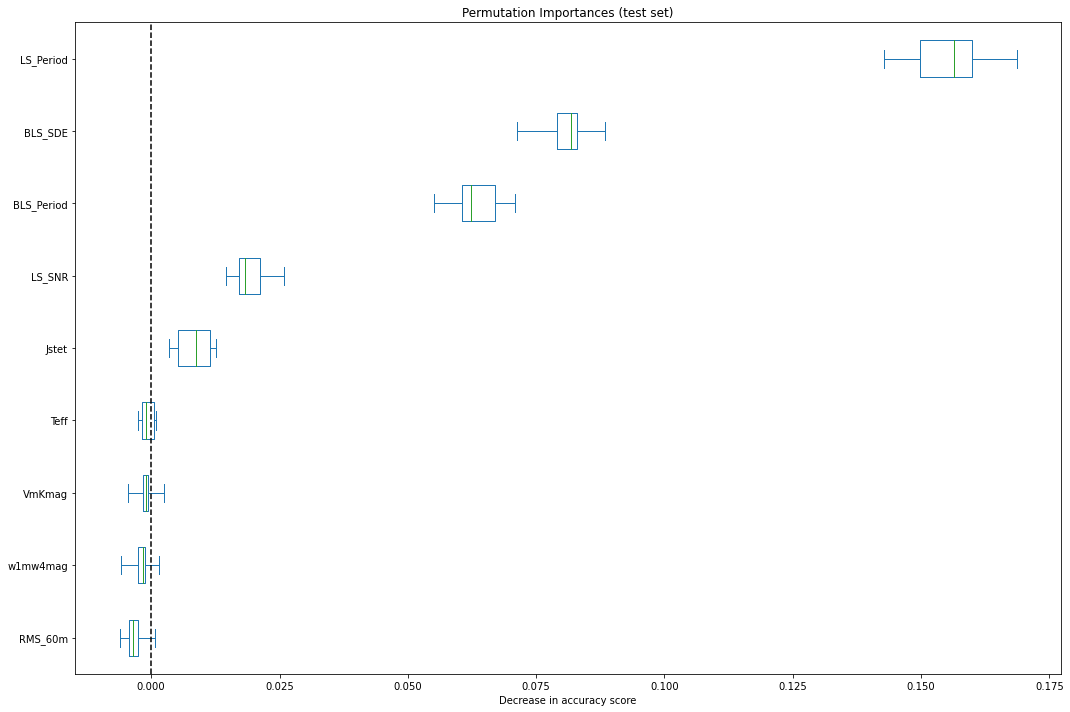

In [22]:
rf = Pipeline([("classifier", RandomForestClassifier(random_state=42))])
rf.fit(X_train, y_train)

result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=10)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(result.importances[sorted_importances_idx].T,columns=X.columns[sorted_importances_idx])
ax = importances.plot.box(vert=False, whis=10,figsize=(15,10))
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [23]:
def typetest(test,testsize,trainsize,nneighbors,nclusters,a):
    
    
    X = test.drop(columns = ['Type'])
    X = X.apply(pd.to_numeric)
    Y = test['Type']
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=testsize, train_size=trainsize)
    
    knn = KNeighborsClassifier(n_neighbors=nneighbors)
    knn.fit(X_train,y_train)
    ypred = knn.predict(X_test)
    
    knnscore = metrics.accuracy_score(y_test, ypred)
    knnmatrix = metrics.confusion_matrix(y_test, ypred)
    print('KNeighborsClassifier:',knnscore)
    print(knnmatrix)
    print(' ')
    
    feature_names = [f"{val}" for val in list(X.columns.values)]
    forest = RandomForestClassifier(random_state=50,n_estimators=100)
    forest.fit(X_train, y_train)
    ypredfor = forest.predict(X_test)
    
    forscore = metrics.accuracy_score(y_test, ypredfor)
    formatrix = metrics.confusion_matrix(y_test, ypredfor)
    print('RandomForestClassifier:',forscore)
    print(formatrix)
    print(' ')
    
    kmeans = KMeans(n_clusters = nclusters, random_state = 0, n_init=100)
    kmeans.fit(X_train)
    ypredkmeans = kmeans.predict(X_test)
    
    silhouette_avg = silhouette_score(X_test, ypredkmeans)
    inertia = kmeans.inertia_
    print("KMeans Silhouette Score:", silhouette_avg)
    print("KMeans Inertia:", inertia)
    print(' ')
    
    mlp = MLPClassifier(solver='lbfgs', alpha=a,hidden_layer_sizes=(15,), max_iter=1000,random_state=1)
    mlp.fit(X_train, y_train)
    ypredmlp = mlp.predict(X_test)
    
    mlpscore = metrics.accuracy_score(y_test, ypredmlp)
    mlpmatrix = metrics.confusion_matrix(y_test, ypredmlp)
    print('MLPClassifier (Multi-layer Perceptron):',mlpscore)
    print(mlpmatrix)
    print(' ')

In [24]:
def importance(test,testsize,trainsize):
    X = test.drop(columns = ['Type'])
    X = X.apply(pd.to_numeric)
    Y = test['Type']
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=testsize, train_size=trainsize)
    
    feature_names = [f"{val}" for val in list(X.columns.values)]
    forest = RandomForestClassifier(random_state=0,n_estimators=10)
    forest.fit(X_train, y_train)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
    forest_importances = pd.Series(importances, index=feature_names)
    fig, ax = plt.subplots(figsize=(15,10))
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    
    rf = Pipeline([("classifier", RandomForestClassifier(random_state=42))])
    rf.fit(X_train, y_train)
    result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=10)
    sorted_importances_idx = result.importances_mean.argsort()
    importances = pd.DataFrame(result.importances[sorted_importances_idx].T,columns=X.columns[sorted_importances_idx])
    ax = importances.plot.box(vert=False, whis=10,figsize=(15,10))
    ax.set_title("Permutation Importances (test set)")
    ax.axvline(x=0, color="k", linestyle="--")
    ax.set_xlabel("Decrease in accuracy score")
    ax.figure.tight_layout()

In [25]:
test = test.drop(columns = ['_1'])

In [26]:
typetest(test,0.25,0.75,10,6,0.1)

KNeighborsClassifier: 0.4996776273372018
[[1070  196   69    7    0    1]
 [ 573  404   51    2    0    2]
 [ 374  133   56    0    0    0]
 [  58   22   10   19    0    0]
 [   0    0    1    0    0    0]
 [  27   21    5    0    0    1]]
 
RandomForestClassifier: 0.6876208897485493
[[1264   47   28    3    0    1]
 [ 312  569  135   13    0    3]
 [ 178  129  246    3    0    7]
 [  36   31    6   35    1    0]
 [   0    0    0    1    0    0]
 [  21    5    9    0    0   19]]
 
KMeans Silhouette Score: 0.599194642511411
KMeans Inertia: 17738152124.402245
 
MLPClassifier (Multi-layer Perceptron): 0.3333333333333333
[[   0 1341    0    0    0    2]
 [   0 1029    0    1    0    2]
 [   0  552    0    1    0   10]
 [   0  109    0    0    0    0]
 [   0    1    0    0    0    0]
 [   0   49    0    0    0    5]]
 


/Users/jadyn/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


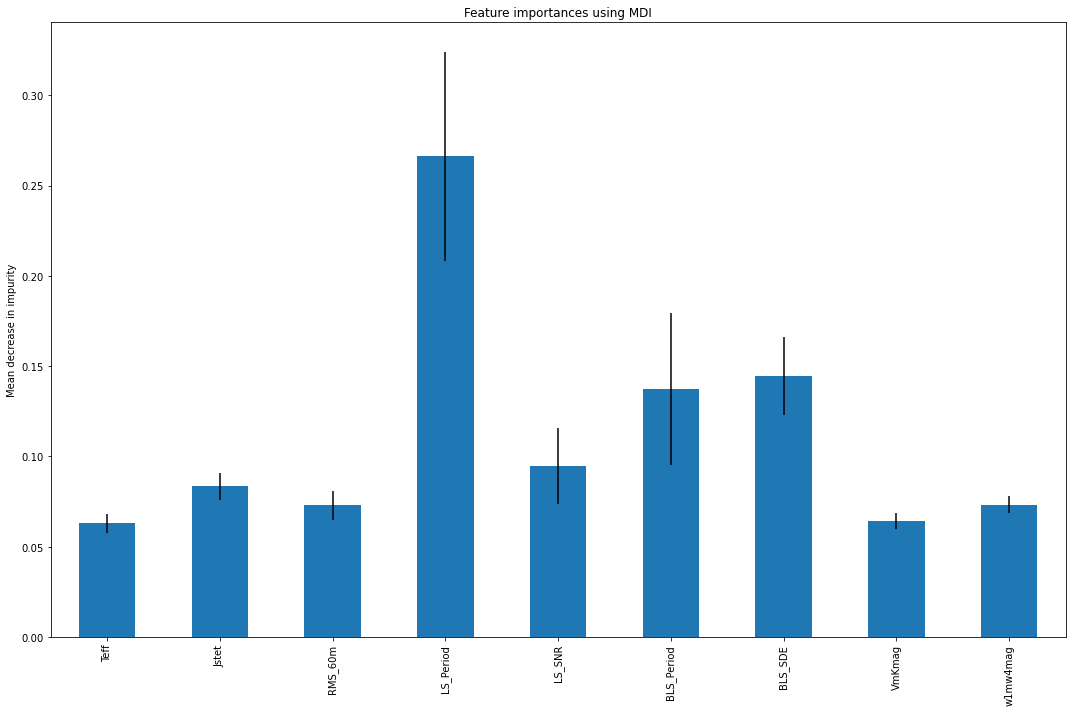

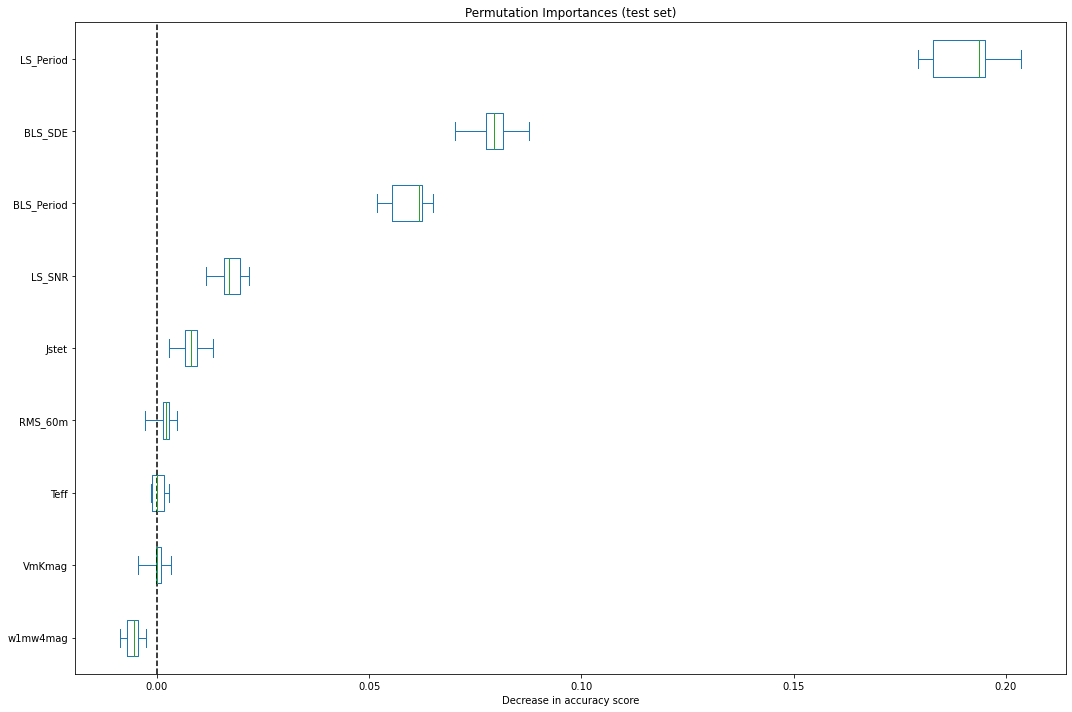

In [27]:
importance(test,0.25,0.75)

In [28]:
RRsam = RR.sample(n=196)
ECsam = EC.sample(n=196)
EDsam = ED.sample(n=196)
DSCTsam = DSCT.sample(n=196)
DCEPsam = DCEP.sample(n=196)

same = pd.concat([RRsam,ECsam,EDsam,DSCTsam,DCEPsam])
same = same[['Type','LS_Period','Jstet','BLS_Period','BLS_SDE']]
same

,Type,LS_Period,Jstet,BLS_Period,BLS_SDE
1742,0,14.64895158,0.09303,13.916504,12.21363
5041,0,6.7683822,-0.20454,0.11989713,4.41291
969,0,0.48574185,11.57789,0.48650471,7.44062
14579,0,16.37235765,0.19252,13.916504,10.62027
1513,0,0.46699678,4.12095,0.46724472,8.29413
...,...,...,...,...,...
14108,5,13.916504,0.51944,0.10420759,8.37456
14670,5,2.3002486,-0.08737,11.51953657,12.33154
16154,5,7.13666872,-0.23745,13.916504,12.80871
14112,5,12.843628,2.85241,0.10408842,8.04572


In [29]:
typetest(same,0.25,0.75,10,6,0.1)

KNeighborsClassifier: 0.4775510204081633
[[25  8  4  4  4]
 [11 13  7  3  0]
 [ 8  9 16  8 10]
 [17 16  1 23  4]
 [ 7  2  3  2 40]]
 
RandomForestClassifier: 0.5918367346938775
[[28  4  6  4  3]
 [ 6 17  4  7  0]
 [10  3 21  5 12]
 [ 9 12  4 33  3]
 [ 4  0  4  0 46]]
 
KMeans Silhouette Score: 0.5420295169422401
KMeans Inertia: 11858.64651232335
 
MLPClassifier (Multi-layer Perceptron): 0.5673469387755102
[[29  4  5  3  4]
 [ 9 16  1  5  3]
 [ 8  6 18  7 12]
 [14 13  4 26  4]
 [ 2  0  1  1 50]]
 


/Users/jadyn/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [30]:
same2 = pd.concat([RRsam,DSCTsam])
same2 = same2[['Type','LS_Period','Jstet','BLS_Period','BLS_SDE']]
same2


,Type,LS_Period,Jstet,BLS_Period,BLS_SDE
1742,0,14.64895158,0.09303,13.916504,12.21363
5041,0,6.7683822,-0.20454,0.11989713,4.41291
969,0,0.48574185,11.57789,0.48650471,7.44062
14579,0,16.37235765,0.19252,13.916504,10.62027
1513,0,0.46699678,4.12095,0.46724472,8.29413
...,...,...,...,...,...
12238,3,14.64895158,-0.28415,0.10409945,6.96321
1988,3,18.55533867,-0.22473,13.01386874,7.14951
17902,3,13.25387143,-1.12438,0.10675814,9.41655
72,3,0.97586435,-0.15309,0.1718676,6.34139


In [31]:
typetest(same2,0.25,0.75,10,6,0.1)

KNeighborsClassifier: 0.7346938775510204
[[44  6]
 [20 28]]
 
RandomForestClassifier: 0.7857142857142857
[[40 10]
 [11 37]]
 
KMeans Silhouette Score: 0.5498504470765085
KMeans Inertia: 3481.3232580257763
 
MLPClassifier (Multi-layer Perceptron): 0.7857142857142857
[[40 10]
 [11 37]]
 


In [32]:
test2 = pd.concat([EC,ED])
test2 = test2.drop(columns = ['_1'])
test2

,Type,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE,VmKmag,w1mw4mag
3,1,6229.0,159.30206,0.08317,0.20540965,13818.54387,0.2052788,9.75553,1.238,0.106
29,1,3660.0,8.4157,0.01285,9.27766933,1374.70683,0.10420759,8.23016,4.091,0.244
34,1,4538.0,3.18539,0.0043,11.1332032,7921.06287,10.89407437,11.78836,2.559,-0.022
43,1,4504.7998046875,-0.02237,0.00067,0.20227477,82.11215,0.4041821,7.36452,2.917,0.106
54,1,6883.0,51.74774,0.08502,0.47741009,8903.95492,0.95354707,9.88294,0.986,0.296
...,...,...,...,...,...,...,...,...,...,...
20147,2,5905.0,0.82034,0.02943,0.1965651,1918.98424,0.39309623,12.56194,1.387,5.944
20158,2,5030.0,2.8304,0.03175,0.17013214,7596.1992,0.34040927,10.32661,2.097,5.680
20159,2,4985.0,-0.23305,0.01341,17.39601125,33.48176,13.916809,6.80815,2.142,5.498
20166,2,3471.0,2.06795,0.01557,0.27049191,6935.62772,0.54166776,9.52943,4.649,4.533


In [33]:
typetest(test2,0.25,0.75,10,6,0.1)

KNeighborsClassifier: 0.6220522625876355
[[851 129]
 [464 125]]
 
RandomForestClassifier: 0.6966220522625877
[[795 185]
 [291 298]]
 
KMeans Silhouette Score: 0.6048870347299885
KMeans Inertia: 9085507497.149181
 
MLPClassifier (Multi-layer Perceptron): 0.6258763543658381
[[979   1]
 [586   3]]
 


In [34]:
test3 = pd.concat([RR,ED])
test3 = test3.drop(columns = ['_1'])
test3

,Type,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE,VmKmag,w1mw4mag
17,0,6689.0,-0.24584,0.00017,2.35872949,97.95273,5.36226045,7.84118,1.030000,0.062
32,0,4995.5,-0.2949,0.00015,12.10130783,46.88342,13.01386874,10.6711,1.991000,0.015
33,0,5135.0,0.8386,0.00204,11.1332032,3955.68909,10.33303424,7.46914,2.121000,-0.028
38,0,4206.0,0.26542,0.0012,3.81274082,135.76632,7.31803081,9.67678,3.009000,0.117
44,0,4478.0,-0.14223,0.00044,1.04635368,16.44768,6.00410837,6.54329,2.210999,-0.065
...,...,...,...,...,...,...,...,...,...,...
20147,2,5905.0,0.82034,0.02943,0.1965651,1918.98424,0.39309623,12.56194,1.387000,5.944
20158,2,5030.0,2.8304,0.03175,0.17013214,7596.1992,0.34040927,10.32661,2.097000,5.680
20159,2,4985.0,-0.23305,0.01341,17.39601125,33.48176,13.916809,6.80815,2.142000,5.498
20166,2,3471.0,2.06795,0.01557,0.27049191,6935.62772,0.54166776,9.52943,4.649000,4.533


In [35]:
typetest(test3,0.25,0.75,10,6,0.1)

KNeighborsClassifier: 0.7076053442959918
[[1307   86]
 [ 483   70]]
 
RandomForestClassifier: 0.8576567317574512
[[1346   47]
 [ 230  323]]
 
KMeans Silhouette Score: 0.44337115522481524
KMeans Inertia: 6344921953.505173
 
MLPClassifier (Multi-layer Perceptron): 0.7183967112024666
[[1376   17]
 [ 531   22]]
 


/Users/jadyn/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [36]:
test4 = pd.concat([EC,DSCT])
test4 = test4.drop(columns = ['_1'])
test4

,Type,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE,VmKmag,w1mw4mag
3,1,6229.0,159.30206,0.08317,0.20540965,13818.54387,0.2052788,9.75553,1.238000,0.106000
29,1,3660.0,8.4157,0.01285,9.27766933,1374.70683,0.10420759,8.23016,4.091000,0.244000
34,1,4538.0,3.18539,0.0043,11.1332032,7921.06287,10.89407437,11.78836,2.559000,-0.022000
43,1,4504.7998046875,-0.02237,0.00067,0.20227477,82.11215,0.4041821,7.36452,2.917000,0.106000
54,1,6883.0,51.74774,0.08502,0.47741009,8903.95492,0.95354707,9.88294,0.986000,0.296000
...,...,...,...,...,...,...,...,...,...,...
20050,3,6500.0,-0.19645,0.01719,0.28518051,118.76635,0.16360102,9.66437,1.028000,5.643001
20060,3,4196.0,-0.24816,0.00274,11.59734083,138.05916,0.17593833,9.41577,3.117999,4.573000
20082,3,7256.0,-1.13834,0.01358,13.916809,13.86847,0.11855417,9.21225,0.665999,5.310000
20134,3,4732.0,-0.16478,0.00226,14.64927263,208.02508,0.10409947,7.23428,2.411001,5.158000


In [37]:
typetest(test4,0.25,0.75,10,6,0.1)

KNeighborsClassifier: 0.9194570135746606
[[1004    1]
 [  88   12]]
 
RandomForestClassifier: 0.9248868778280543
[[996   9]
 [ 74  26]]
 
KMeans Silhouette Score: 0.5949602659293228
KMeans Inertia: 5589521001.630632
 
MLPClassifier (Multi-layer Perceptron): 0.8986425339366516
[[991  14]
 [ 98   2]]
 


/Users/jadyn/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


'Type','Teff','Jstet','RMS_60m','LS_Period','LS_SNR','BLS_Period','BLS_SDE','VmKmag','w1mw4mag'

In [113]:
cols = ['Teff','Jstet','RMS_60m','LS_Period','LS_SNR','BLS_Period','BLS_SDE','VmKmag','w1mw4mag']

In [114]:
test = pd.concat([RR,EC,ED,DSCT,GDOR,DCEP])
test = test.drop(columns = ['_1'])

In [72]:
knndict = {}

for val in cols:
    for val2 in cols2:
        for val3 in cols3:
            if val != val2 and val != val3 and val2 != val3:
                
                X = test[[val,val2,val3]]
                X = X.apply(pd.to_numeric)
                Y = test['Type']
                X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, train_size=0.75)
                
                knn = KNeighborsClassifier(n_neighbors=10)
                knn.fit(X_train,y_train)
                ypred = knn.predict(X_test)
                knnscore = metrics.accuracy_score(y_test, ypred)
                
                knndict.update({knnscore:[val,val2,val3]})
                
knnscores = list(knndict.keys())
knnmaxscore = max(knnscores)
knnvals = knndict[knnmaxscore]

print(knnmaxscore,knnvals)

0.6876208897485493 ['BLS_SDE', 'RMS_60m', 'LS_Period']


In [124]:
mlpdict = {}

for val in cols:
    for val2 in cols2:
        for val3 in cols3:
            if val != val2 and val != val3 and val2 != val3:
                
                X = test[[val,val2,val3]]
                X = X.apply(pd.to_numeric)
                Y = test['Type']
                X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, train_size=0.75)
                
                mlp = MLPClassifier(solver='lbfgs', alpha=0.001,hidden_layer_sizes=(15,), max_iter=10,random_state=1)
                with warnings.catch_warnings():
                    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
                    mlp.fit(X_train, y_train)
                ypredmlp = mlp.predict(X_test)
                mlpscore = metrics.accuracy_score(y_test, ypredmlp)

                mlpdict.update({mlpscore:[val,val2,val3]})
                
mlpscores = list(mlpdict.keys())
mlpmaxscore = max(mlpscores)
mlpvals = mlpdict[mlpmaxscore]

print(mlpmaxscore,mlpvals)

0.5725338491295938 ['RMS_60m', 'LS_Period', 'w1mw4mag']


In [141]:
kmeansdict = {}

for val in cols:
    for val2 in cols2:
        for val3 in cols3:
            if val != val2 and val != val3 and val2 != val3:
                
                X = test[[val,val2,val3]]
                X = X.apply(pd.to_numeric)
                Y = test['Type']
                X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, train_size=0.75)
                
                kmeans = KMeans(n_clusters = 3, random_state = 0, n_init=10)
                kmeans.fit(X_train)
                ypredkmeans = kmeans.fit_predict(X_test)
                silhouette = silhouette_score(X_test, ypredkmeans)

                kmeansdict.update({silhouette:[val,val2,val3]})
                
kmeansscores = list(kmeansdict.keys())
kmeansmaxscore = max(kmeansscores)
kmeansvals = kmeansdict[kmeansmaxscore]

print(kmeansmaxscore,kmeansvals)

0.8579112503799613 ['Jstet', 'LS_Period', 'LS_SNR']


In [136]:
def bestcols(dataset,cols,classifier,numcols,silhouette):
    start_time = datetime.now()

    dict2 = {}
    dict3 = {}
    dict4 = {}
    dict5 = {}

    for val in cols:
        for val2 in cols:
            vals2 = [val,val2]
            if len(vals2) == len(set(vals2)) and numcols >= len(vals2):
                X = dataset[vals2]
                X = X.apply(pd.to_numeric)
                Y = dataset['Type']
                X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, train_size=0.75)
                
                cl = classifier
                with warnings.catch_warnings():
                    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
                    cl.fit(X_train, y_train)
                if silhouette == False:
                    ypred = cl.predict(X_test)
                    score = metrics.accuracy_score(y_test, ypred)
                if silhouette == True:
                    ypred = cl.fit_predict(X_test)
                    score = silhouette_score(X_test, ypred)

                dict2.update({score:vals2})
                
            for val3 in cols:
                vals3 = [val,val2,val3]
                if len(vals3) == len(set(vals3)) and numcols >= len(vals3):
                
                    X = dataset[vals3]
                    X = X.apply(pd.to_numeric)
                    Y = dataset['Type']
                    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, train_size=0.75)
                
                    cl = classifier
                    with warnings.catch_warnings():
                        warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
                        cl.fit(X_train, y_train)
                    if silhouette == False:
                        ypred = cl.predict(X_test)
                        score = metrics.accuracy_score(y_test, ypred)
                    if silhouette == True:
                        ypred = cl.fit_predict(X_test)
                        score = silhouette_score(X_test, ypred)

                    dict3.update({score:vals3})
                
                for val4 in cols:
                    vals4 = [val,val2,val3,val4]
                    if len(vals4) == len(set(vals4)) and numcols >= len(vals4):
                    
                        X = dataset[vals4]
                        X = X.apply(pd.to_numeric)
                        Y = dataset['Type']
                        X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, train_size=0.75)
                
                        cl = classifier
                        with warnings.catch_warnings():
                            warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
                            cl.fit(X_train, y_train)
                        if silhouette == False:
                            ypred = cl.predict(X_test)
                            score = metrics.accuracy_score(y_test, ypred)
                        if silhouette == True:
                            ypred = cl.fit_predict(X_test)
                            score = silhouette_score(X_test, ypred)

                        dict4.update({score:vals4})
                        
                    for val5 in cols:
                        vals5 = [val,val2,val3,val4,val5]
                        if len(vals4) == len(set(vals5)) and numcols >= len(vals5):
                    
                            X = dataset[vals5]
                            X = X.apply(pd.to_numeric)
                            Y = dataset['Type']
                            X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, train_size=0.75)
                
                            cl = classifier
                            with warnings.catch_warnings():
                                warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
                                cl.fit(X_train, y_train)
                            if silhouette == False:
                                ypred = cl.predict(X_test)
                                score = metrics.accuracy_score(y_test, ypred)
                            if silhouette == True:
                                ypred = cl.fit_predict(X_test)
                                score = silhouette_score(X_test, ypred)

                            dict5.update({score:vals5})
                    
    if numcols >= len(vals2):          
        scores2 = list(dict2.keys())
        maxscore2 = max(scores2)
        cols2 = dict2[maxscore2]
        print(formaxscore2,cols2)
    
    if numcols >= len(vals3):           
        scores3 = list(dict3.keys())
        maxscore3 = max(scores3)
        cols3 = dict3[maxscore3]
        print(maxscore3,cols3)
    
    if numcols >= len(vals4):
        scores4 = list(dict4.keys())
        maxscore4 = max(scores4)
        cols4 = dict4[maxscore4]
        print(maxscore4,cols4)
        
    if numcols >= len(vals5):
        scores5 = list(dict5.keys())
        maxscore5 = max(scores5)
        cols5 = dict5[maxscore5]
        print(maxscore5,cols5)

    X = dataset.drop(columns = ['Type'])
    X = X.apply(pd.to_numeric)
    Y = dataset['Type']
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.25, train_size=.75)

    cl = classifier
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
        cl.fit(X_train, y_train)
    ypred = cl.predict(X_test)
    score = metrics.accuracy_score(y_test, ypred)

    print(score,"All columns")

    end_time = datetime.now()
    print('Duration: {}'.format(end_time - start_time))

In [129]:
bestcols(test,cols,RandomForestClassifier(random_state=50,n_estimators=10),4,False)

0.6360412637008381 ['BLS_Period', 'LS_Period']
0.6663442940038685 ['LS_Period', 'BLS_Period', 'BLS_SDE']
0.6811734364925854 ['LS_Period', 'Jstet', 'BLS_Period', 'BLS_SDE']
0.6734364925854287 All columns
Duration: 0:08:12.130688


In [122]:
bestcols(test,cols,KNeighborsClassifier(n_neighbors=10),4,False)

0.6360412637008381 ['LS_Period', 'BLS_Period']
0.6895551257253385 ['BLS_SDE', 'BLS_Period', 'LS_Period']
0.6985815602836879 ['LS_Period', 'BLS_Period', 'BLS_SDE', 'RMS_60m']
0.4977433913604126 All columns
Duration: 0:02:44.722187


In [126]:
bestcols(test,cols,MLPClassifier(solver='lbfgs', alpha=0.001,hidden_layer_sizes=(15,), max_iter=10,random_state=1),4,False)

0.6360412637008381 ['VmKmag', 'LS_Period']
0.5921985815602837 ['LS_Period', 'w1mw4mag', 'RMS_60m']
0.6092843326885881 ['LS_Period', 'w1mw4mag', 'RMS_60m', 'BLS_Period']
0.3639587362991618 All columns
Duration: 0:06:31.145432


In [144]:
bestcols(test,cols,KMeans(n_clusters = 3, random_state = 0, n_init=10),2,True)

0.6360412637008381 ['Jstet', 'RMS_60m']
0.5019342359767892 All columns
Duration: 0:00:12.265584
